<a href="https://colab.research.google.com/github/PX2145-2025/week-10-b-Callum-mason68/blob/main/Fourier_analyse_withnotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =========================
# CELL 0 — Imports + helper
# =========================

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def Spectrum1(x, Fs):
    """
    Returns the one-sided frequency array and the one-sided FFT (normalised).

    x  = time-domain samples
    Fs = sampling frequency (samples per second)

    Output:
    frq = frequencies from 0 to Nyquist (Hz)
    X   = complex FFT values for those frequencies
    """
    N = len(x)                               # number of samples in the signal
    frq = (float(Fs)/N) * np.arange(0, N//2 + 1)  # frequency for each FFT bin (one-sided)
    X = fft(x) / N                           # FFT + normalisation so amplitudes are not N-dependent
    X = X[0:N//2 + 1]                        # keep only positive freqs (real signals are symmetric)
    return frq, X


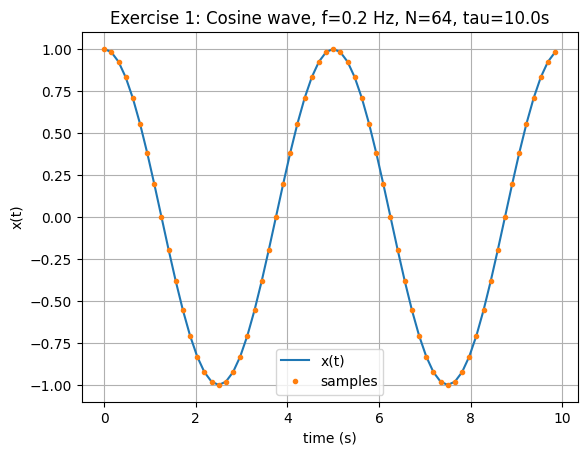

In [2]:
# =========================
# EXERCISE 1 — Plot x(t)
# =========================

# Choose number of samples (FFT works fastest for powers of 2)
N = 64

# Total time duration that your samples cover (seconds)
tau = 10.0

# Create time samples:
# endpoint=False avoids including tau itself, making the signal periodic over [0, tau)
t = np.linspace(0, tau, N, endpoint=False)

# Choose the cosine frequency in Hz
f = 0.2

# Create the sampled cosine signal
# 2π f t gives the phase angle at each time sample
x = np.cos(2*np.pi*f*t)

# Plot x(t) against time
plt.plot(t, x, label="x(t)")
plt.plot(t, x, '.', label="samples")  # show discrete points
plt.title(f'Exercise 1: Cosine wave, f={f} Hz, N={N}, tau={tau}s')
plt.xlabel('time (s)')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.show()


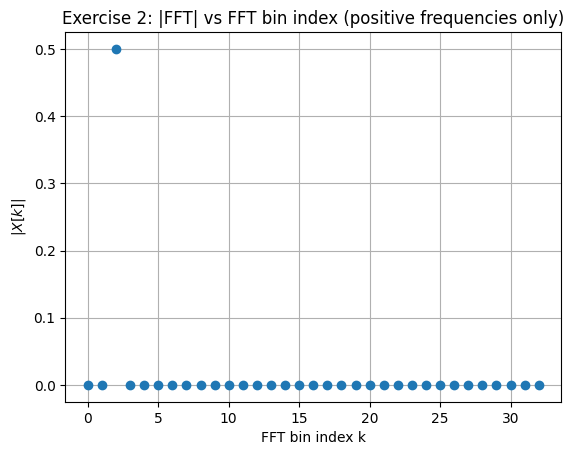

In [3]:
# ==========================================
# EXERCISE 2 — FFT magnitude vs bin number
# ==========================================

# Compute FFT of x (time-domain -> frequency-domain)
# Divide by N to normalise amplitude (so peak heights are meaningful)
X = fft(x) / N

# For real-valued signals, the negative-frequency half is a mirror image.
# So we plot only the first half (0 to Nyquist): indices 0 ... N/2
X_pos = X[0:N//2 + 1]

# np.abs gives magnitude of complex FFT values:
# |a+ib| = sqrt(a^2 + b^2) => "how strong is that frequency component?"
plt.plot(np.abs(X_pos), 'o')

plt.title('Exercise 2: |FFT| vs FFT bin index (positive frequencies only)')
plt.xlabel('FFT bin index k')
plt.ylabel(r'$|X[k]|$')
plt.grid(True)
plt.show()


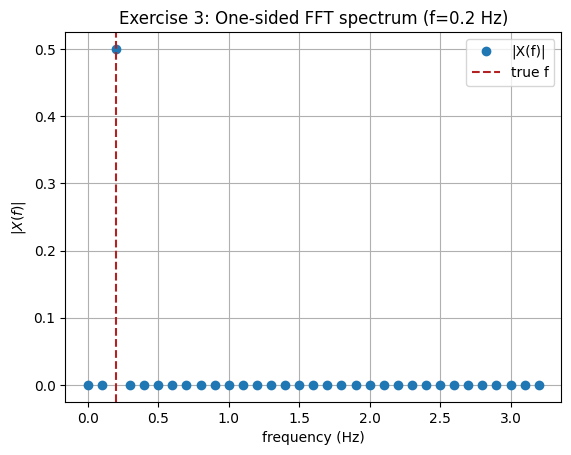

In [4]:
# ======================================
# EXERCISE 3 — FFT magnitude vs frequency
# ======================================

# Sampling frequency Fs = samples per second
# We took N samples over tau seconds, so Fs = N/tau
Fs = N / tau

# Use the helper to get one-sided frequency axis and FFT
frq, X = Spectrum1(x, Fs)

# Plot amplitude spectrum: magnitude vs frequency (Hz)
plt.plot(frq, np.abs(X), 'o', label='|X(f)|')

# Mark the true cosine frequency with a vertical line
plt.axvline(f, ls='--', color='firebrick', label='true f')

plt.title(f'Exercise 3: One-sided FFT spectrum (f={f} Hz)')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$|X(f)|$')
plt.legend()
plt.grid(True)
plt.show()


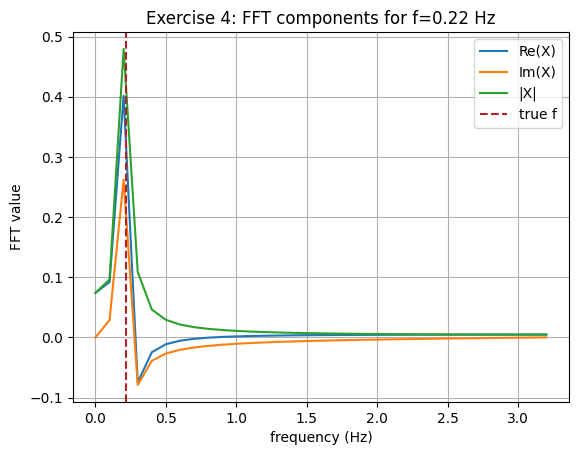

In [5]:
# ====================================================
# EXERCISE 4 — Change f to 0.22 Hz and plot Re/Im/|X|
# ====================================================

# Change frequency slightly (this often shows "spectral leakage" if it doesn't match a bin nicely)
f = 0.22

# Rebuild the signal with the new frequency
x = np.cos(2*np.pi*f*t)

# Compute one-sided spectrum again
frq, X = Spectrum1(x, Fs=N/tau)

# Plot real part (cosine-like contribution), imaginary part (sine-like), and magnitude
plt.plot(frq, np.real(X), label='Re(X)')
plt.plot(frq, np.imag(X), label='Im(X)')
plt.plot(frq, np.abs(X), label='|X|')

# Mark the true frequency
plt.axvline(f, ls='--', color='firebrick', label='true f')

plt.title(f'Exercise 4: FFT components for f={f} Hz')
plt.xlabel('frequency (Hz)')
plt.ylabel('FFT value')
plt.legend()
plt.grid(True)
plt.show()


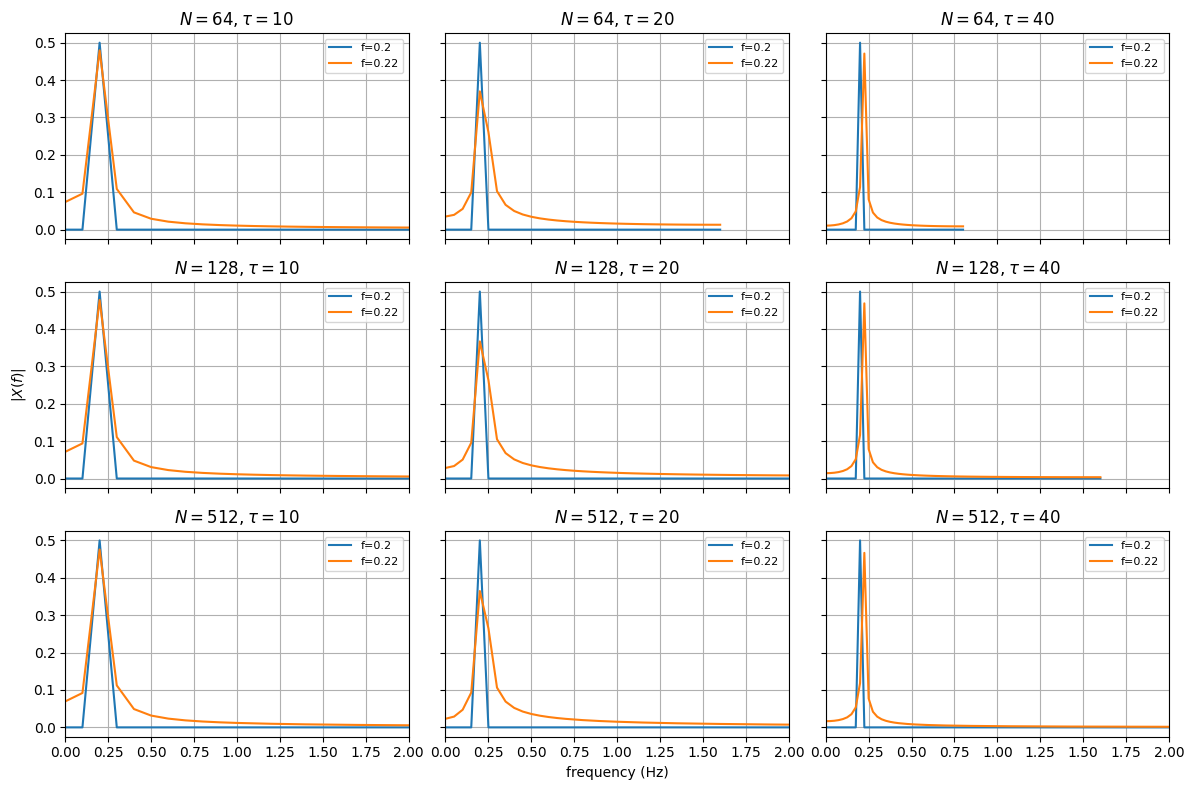

In [6]:
# ======================================================
# EXERCISE 5 — Compare resolution for different N and tau
# ======================================================

# Make a 3x3 grid of plots
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 8))

# Loop over different sample counts and time windows
for i, N in enumerate([64, 128, 512]):
    for j, tau in enumerate([10, 20, 40]):

        # Build time array for this N, tau
        t = np.linspace(0, tau, N, endpoint=False)

        # Plot two cosine frequencies on the same subplot
        for f in [0.2, 0.22]:
            x = np.cos(2*np.pi*f*t)

            # Fs depends on N and tau
            Fs = N / tau
            frq, X = Spectrum1(x, Fs)

            # Plot magnitude spectrum
            ax[i, j].plot(frq, np.abs(X), label=f'f={f}')

        ax[i, j].set_title(rf'$N={N}, \tau={tau}$')
        ax[i, j].grid(True)
        ax[i, j].legend(fontsize=8)

# Label axes neatly
ax[2, 1].set_xlabel('frequency (Hz)')
ax[1, 0].set_ylabel(r'$|X(f)|$')

# Zoom in to where the peaks are
plt.xlim(0, 2)

plt.tight_layout()
plt.show()


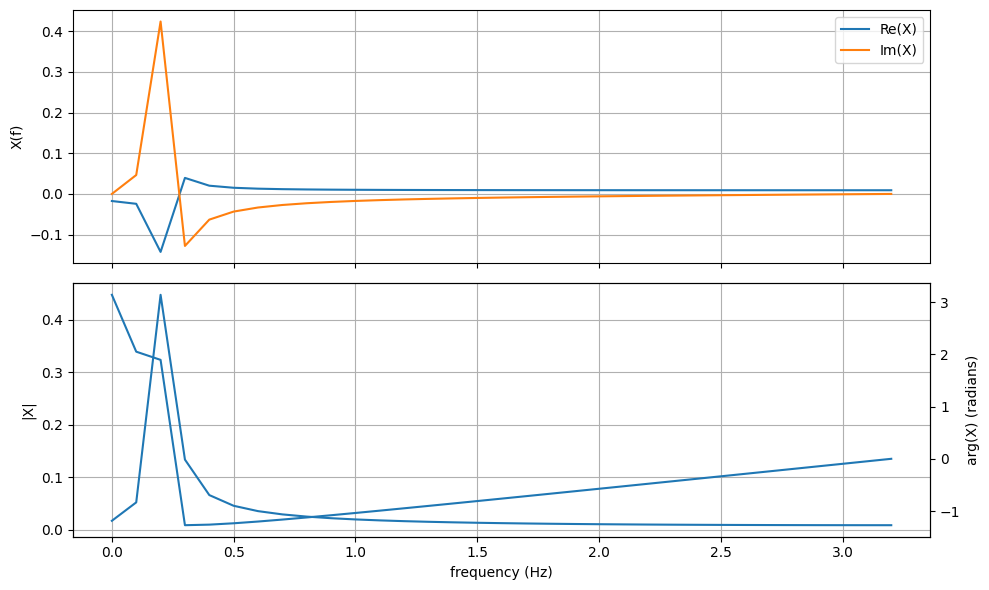

In [7]:
# ============================================
# EXERCISE 6 — Add phase shift and plot phase
# ============================================

# Reset to a standard case
N = 64
tau = 10.0
t = np.linspace(0, tau, N, endpoint=False)

Fs = N / tau
f = 0.22

# Add a phase offset (radians)
phase = np.pi / 2.5

# Signal now has the same frequency but shifted in time/phase
x = np.cos(2*np.pi*f*t + phase)

# FFT
frq, X = Spectrum1(x, Fs)

# Two-panel plot:
# Top: Re and Im
# Bottom: magnitude, plus a twin axis for phase angle
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax[0].plot(frq, np.real(X), label='Re(X)')
ax[0].plot(frq, np.imag(X), label='Im(X)')
ax[0].set_ylabel('X(f)')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(frq, np.abs(X), label='|X|')
ax[1].set_ylabel('|X|')
ax[1].set_xlabel('frequency (Hz)')
ax[1].grid(True)

# Twin y-axis: phase angle arg(X)
ax2 = ax[1].twinx()
ax2.plot(frq, np.angle(X))
ax2.set_ylabel('arg(X) (radians)')

plt.tight_layout()
plt.show()


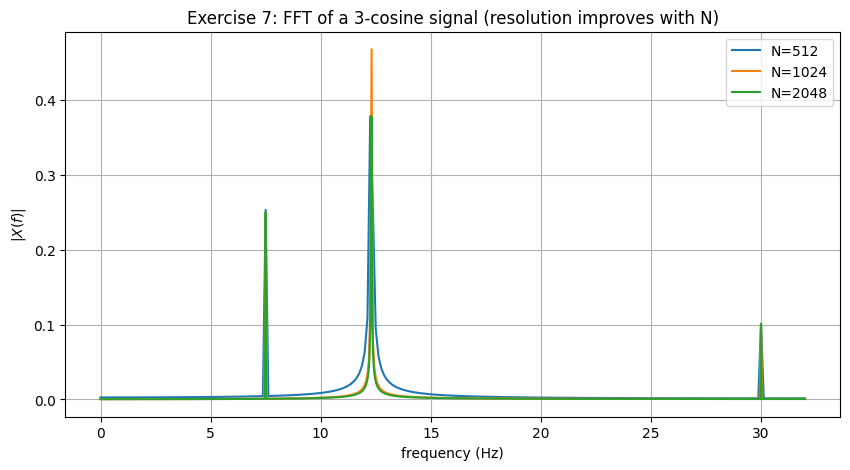

In [8]:
# ======================================================
# EXERCISE 7 — Three-frequency test signal + compare N
# ======================================================

def TestData(N, Fs):
    """
    Creates N samples of a signal that is the sum of 3 cosines:
    frequencies: 12.3, 7.5, 30.0 Hz
    amplitudes:  1.0, 0.5, 0.2
    """
    tau = N / Fs
    t = np.linspace(0, tau, N, endpoint=False)

    freqs = [12.3, 7.5, 30.0]
    amps  = [1.0, 0.5, 0.2]

    x = np.zeros_like(t)
    for a, f in zip(amps, freqs):
        x += a * np.cos(2*np.pi*f*t)

    return x

# Choose a sampling frequency (Hz)
Fs = 64

plt.figure(figsize=(10, 5))

# Compare how increasing N improves frequency resolution
for N in [512, 1024, 2048]:
    x = TestData(N, Fs)
    frq, X = Spectrum1(x, Fs)
    plt.plot(frq, np.abs(X), label=f'N={N}')

plt.title('Exercise 7: FFT of a 3-cosine signal (resolution improves with N)')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$|X(f)|$')
plt.legend()
plt.grid(True)
plt.show()
